In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_excel(r'Data_Train.xlsx')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
# looking into the data,'duration' column has hour,min format which can not be read by the model. we have preprocess it first
train_data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [9]:
# find the missing values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
# only 2 records
train_data.dropna(inplace=True)

In [11]:
train_data.shape

(10682, 11)

In [12]:
train_data.isnull().sum()                                                                                                         

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

In [13]:
# from description it is clear that date of journey column is object datatype. we have change it to timestamp so as to us efor prediction.
# for that we can use pandas.to_datetime function to change object to datetime dtype
# dt.day will extract only day of that date
# dt.month will extract only month of that day.

In [14]:
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [15]:
train_data['Journey_month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
# now we dont want the date of journey column. we extracted the data that we want from that column.
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [18]:
# similar to date of journey, we do EDA to departure time, we have to extract hour and minute from it
# extracting hours and minute
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute


/tmp/ipykernel_11460/610592526.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
/tmp/ipykernel_11460/610592526.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute


In [19]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
# drop the dep_time column
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [22]:
# like wise EDA to arrival time too

In [23]:
# extracting hours and minute
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.head()

/tmp/ipykernel_11460/1267085103.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
/tmp/ipykernel_11460/1267085103.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [24]:
# drop the Arrival_time column
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
# x=list(train_data['Duration'])

In [27]:
# m="2h 5m".split(sep="h")[0]
# print(m)


In [28]:
# n="2h 5m"
# n.split()

In [29]:
# int(n[1].split(sep="m")[0])

In [30]:
# duration is the time taken for the flight 
# let us separate hour and minute form Duration column
#  fisrt assign it into a list

duration=list(train_data['Duration'])

for i in range(len(duration)):
      if len(duration[i].split()) !=2:
            if 'h' in duration[i]:
                duration[i]=duration[i].strip() + " 0m"
            else:
                duration[i]= "0h " +duration[i]

                
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


In [31]:
train_data['Duration_hours']= duration_hours
train_data['Duration_mins'] = duration_mins

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# handling categorical features

In [35]:
# nominal data = no order in data  - One hot encoding
# ordinal data = there is order - label encoding

In [36]:
train_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

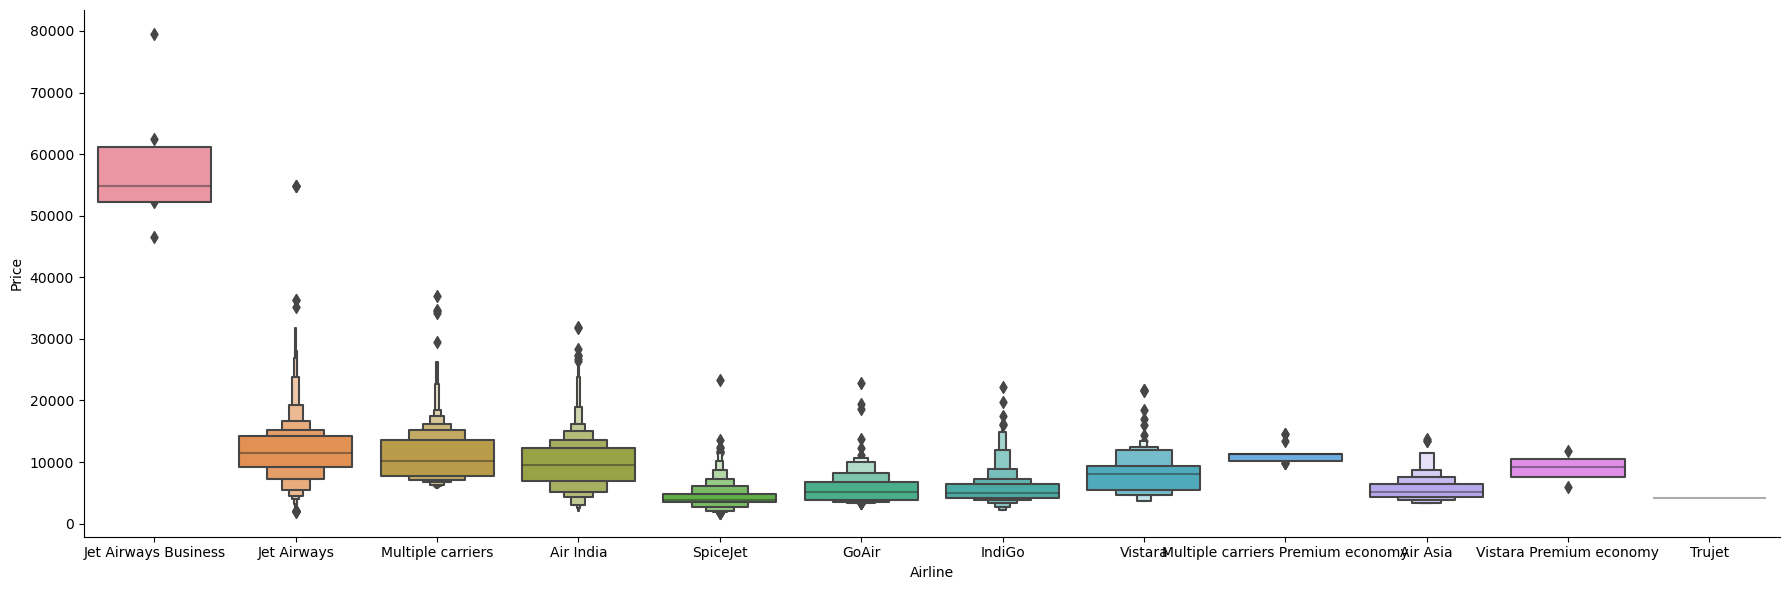

In [37]:
# let us compare the price with Airline
sns.catplot(y="Price",x="Airline", data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [38]:
# airlines are nominal we are using onehot encoding
Airline=train_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [39]:
# next feature
train_data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

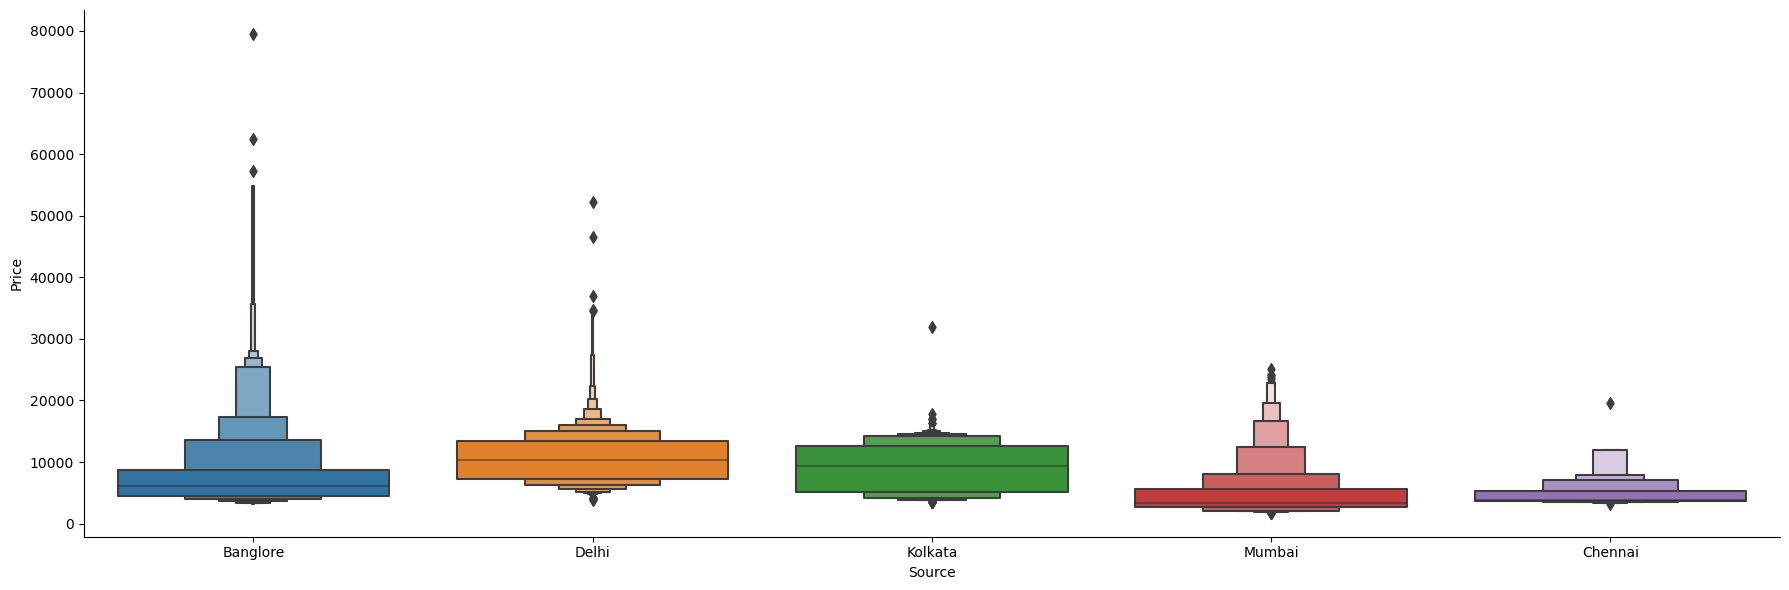

In [40]:
sns.catplot(y="Price",x="Source", data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [41]:
# Sources are nominal we are using onehot encoding
Source=train_data['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [42]:
# next feature
train_data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

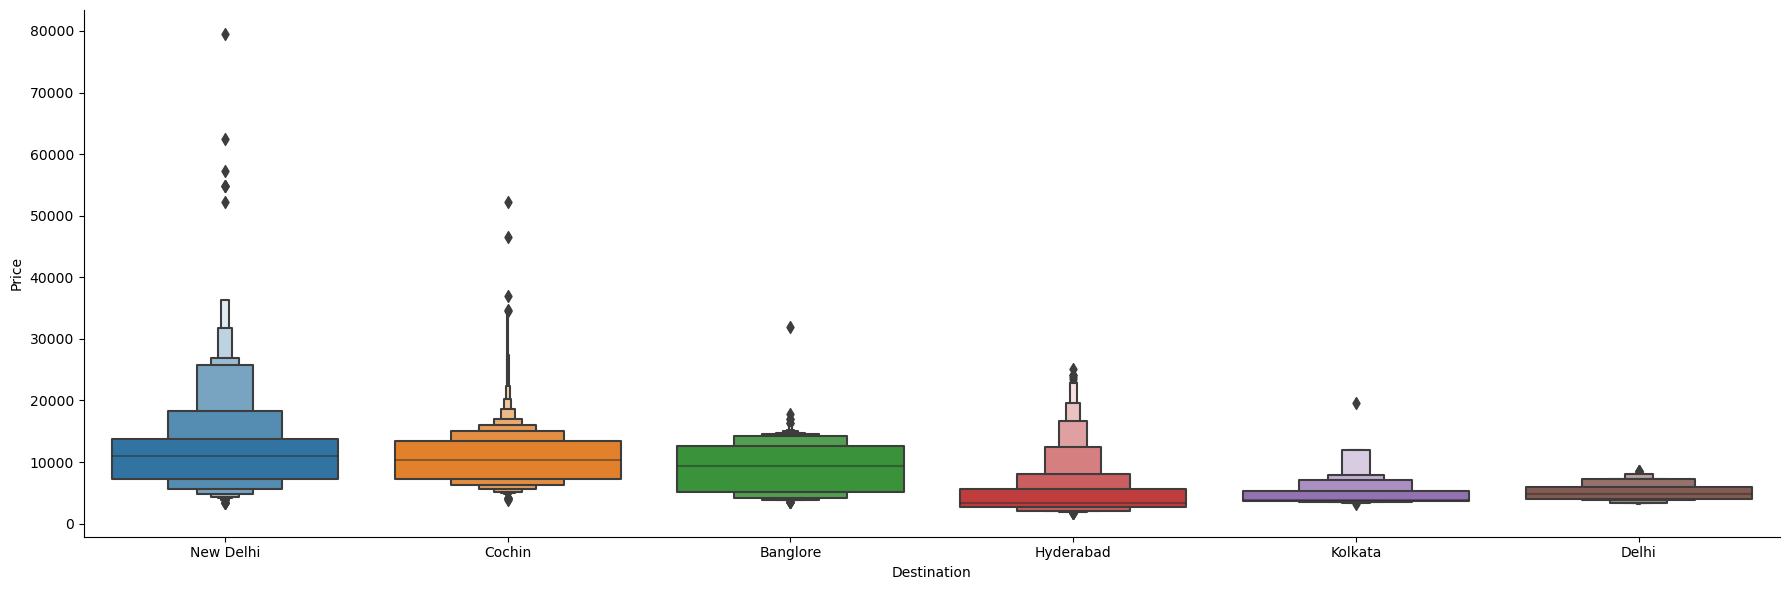

In [43]:
sns.catplot(y="Price",x="Destination", data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

In [44]:
# Destinations are nominal we are using onehot encoding
Destination=train_data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [45]:
 train_data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [46]:
# we can see that out of total 8344 is No info. means 80% of values No info.so let us drop the column.also route and total stops are related
# so let us drop route also

In [47]:
 train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [48]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [49]:
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [50]:
# here we can see a ordinal data.from the data for non-stop price is low. no.of stops increases price increased.
# so there is order. so label encoding

In [51]:
train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace=True)

In [52]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [53]:
# concat all the columns that we one hot encoded
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [54]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [55]:
data_train.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [56]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [57]:
data_train.shape

(10682, 30)

# Test set

In [58]:
test_data=pd.read_excel(r'Test_set.xlsx')

In [59]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [60]:
# we have to do all the preprocessing in the test data too. we do not do it together(train and test) to avoid data leakage 

In [61]:
test_data.shape

(2671, 10)

In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [63]:
test_data.dropna(inplace=True)

In [64]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [65]:
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute



/tmp/ipykernel_11460/171306952.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
/tmp/ipykernel_11460/171306952.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute
/tmp/ipykernel_11460/171306952.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
/tmp/ipykernel_11460/171306952.py:6: UserWarning: Could not infer format, so each element will be parsed individually,

In [66]:
test_data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)


In [67]:
# duration is the time taken for the flight 
# let us separate hour and minute form Duration column
#  fisrt assign it into a list

duration=list(test_data['Duration'])

for i in range(len(duration)):
      if len(duration[i].split()) !=2:
            if 'h' in duration[i]:
                duration[i]=duration[i].strip() + " 0m"
            else:
                duration[i]= "0h " +duration[i]

                
duration_hours=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
test_data['Duration_hours']= duration_hours
test_data['Duration_mins'] = duration_mins
test_data.drop(['Duration'],axis=1,inplace=True)

In [68]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


# Handling categorical data

In [69]:
Airline=test_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Source=test_data['Source']
Source=pd.get_dummies(Source,drop_first=True)
Destination=test_data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)


In [70]:
#  test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [71]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [72]:
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace=True)

In [73]:
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

In [74]:
data_test.drop(['Airline','Source','Destination'],axis=1, inplace=True)

In [75]:
data_test.head()

,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,DEL → BOM → COK,1,No info,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,BLR → DEL,0,No info,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [78]:
 data_test.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [79]:
data_test.shape

(2671, 28)

# Feature Selection

In [80]:
# we use heatmap,feature_importance_,best feature

In [81]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [83]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [90]:
X=data_train.iloc[:,0:30]

X.head()


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [92]:
X.drop(['Price'],axis=1,inplace=True)


KeyError: "['Price'] not found in axis"

In [93]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [94]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

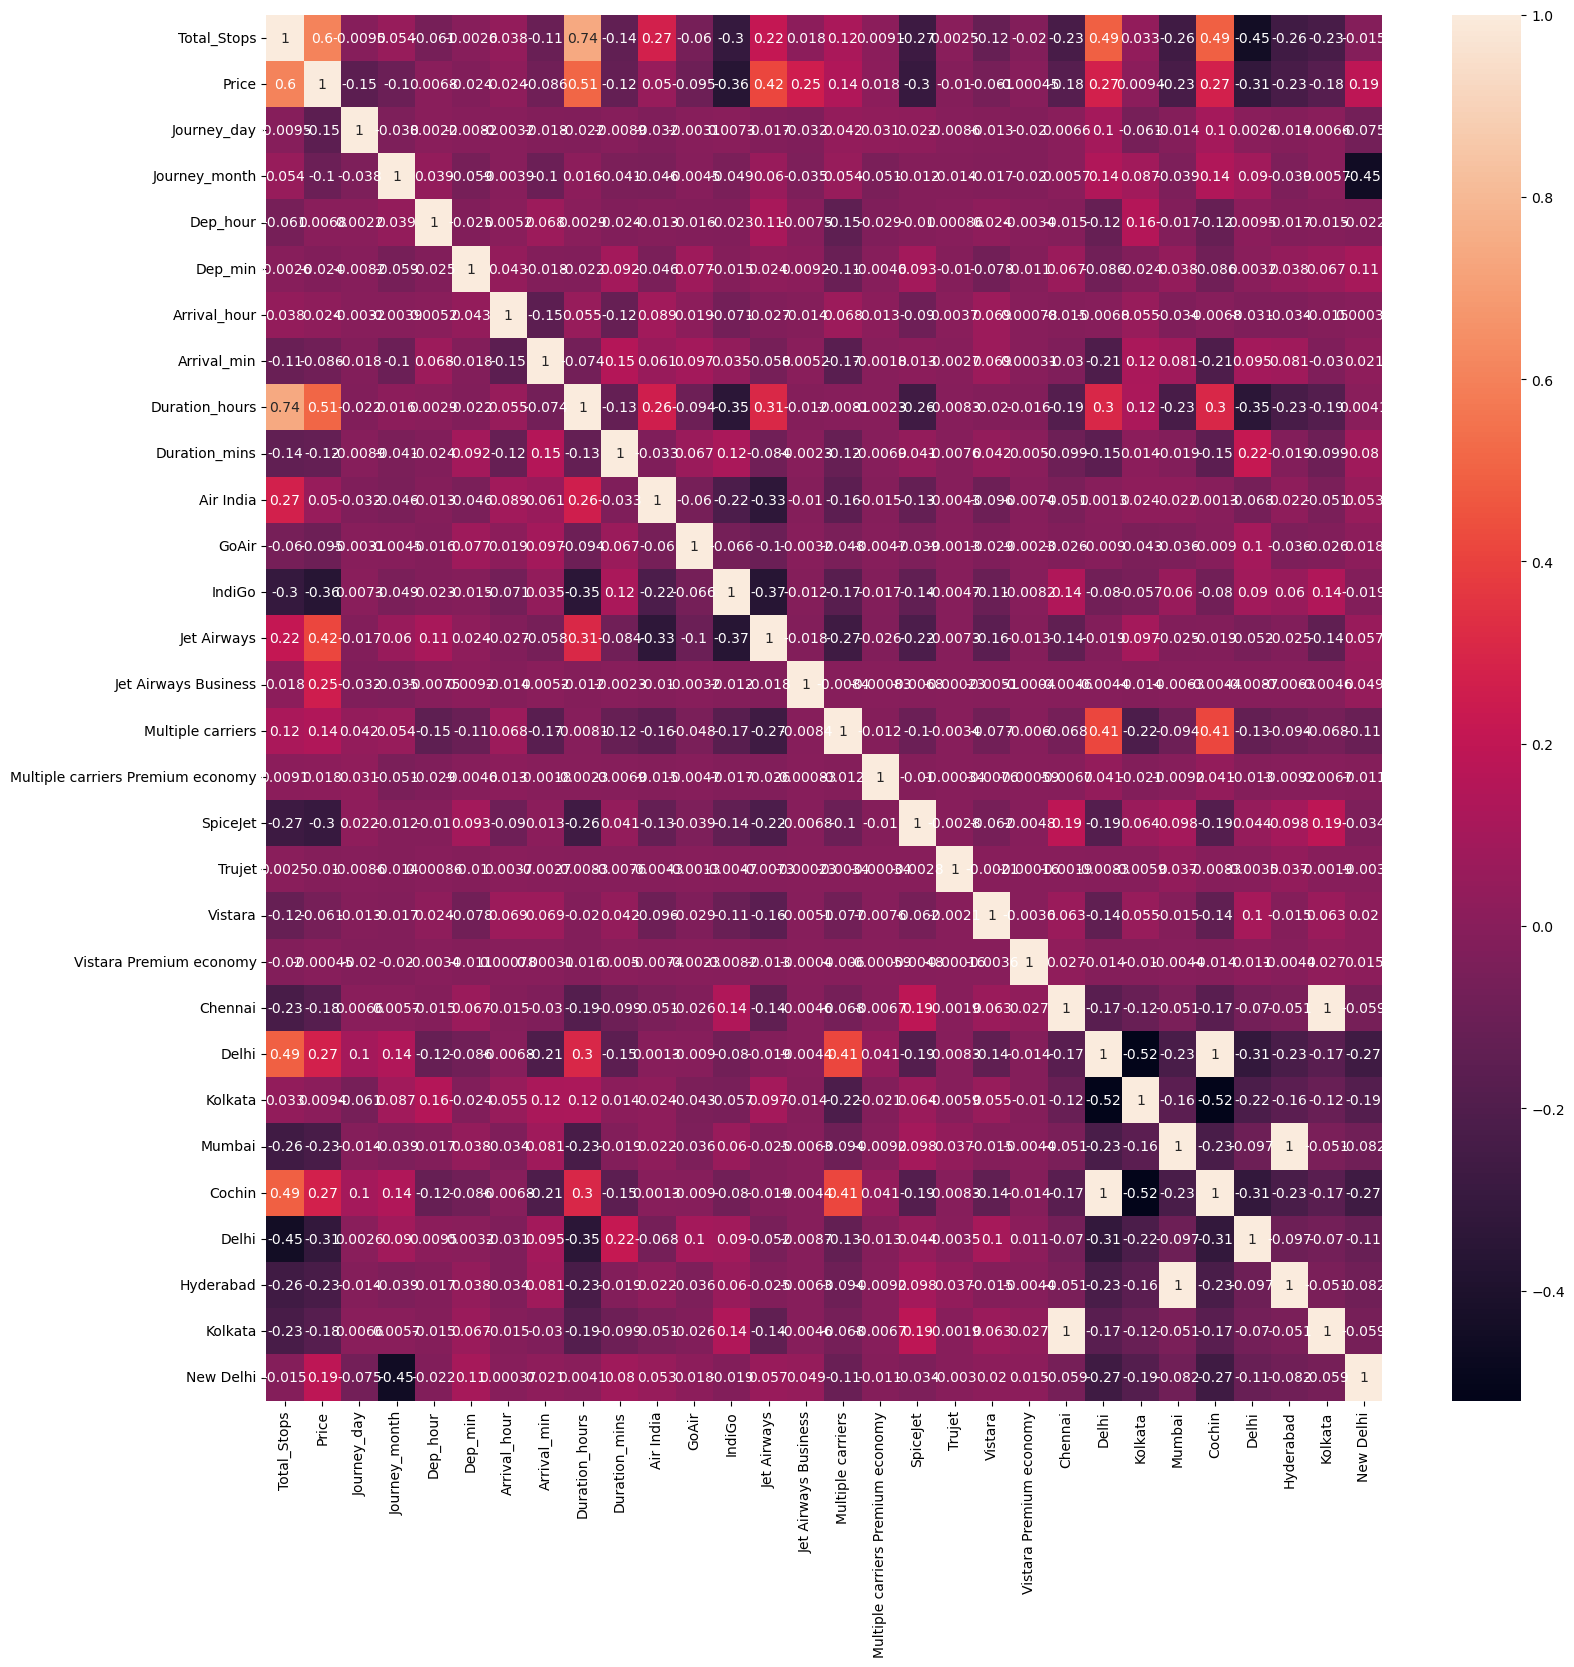

In [95]:
# find the correlation between dependent and independant feature
plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(),annot=True)
plt.show()

In [96]:
# finding important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

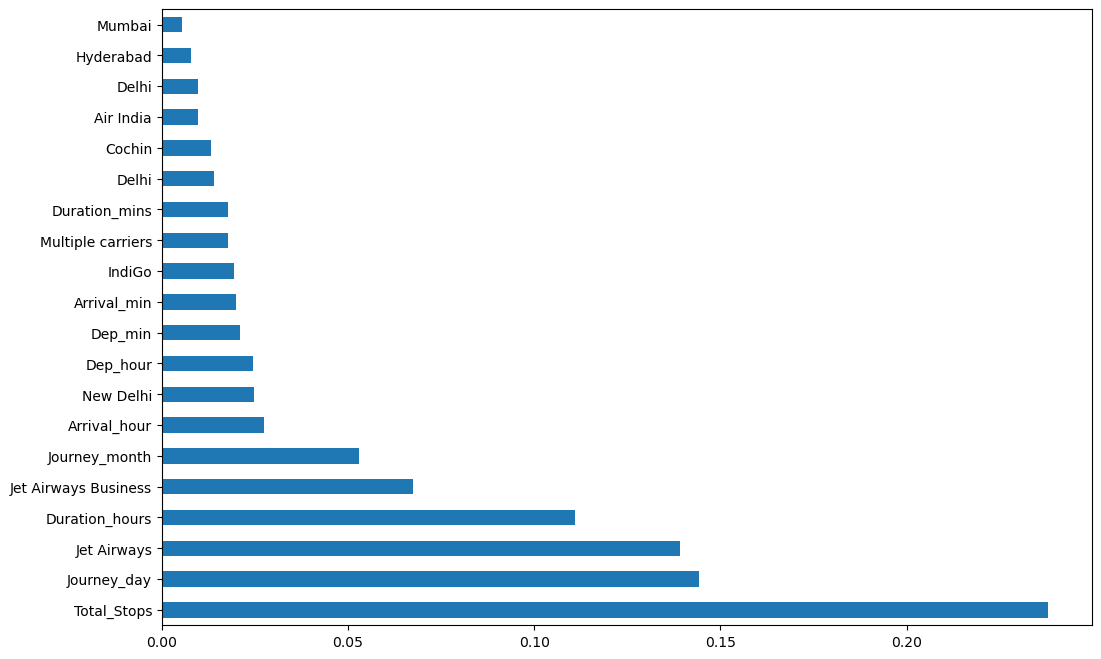

In [97]:
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

# fitting model using Random Forest

In [98]:
# do train test split
# 1. do scaling if needed. for random forest no need of it.
# 2. import model
# 3. fit model
# 4. predict 
# 5. in regression check RSME score
# 6. plot graph

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [100]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
y_pred=reg_rf.predict(X_test)

In [102]:
reg_rf.score(X_train,y_train)

0.9536801249408885

In [103]:
reg_rf.score(X_test,y_test)

0.8056160152528422

/tmp/ipykernel_11460/3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


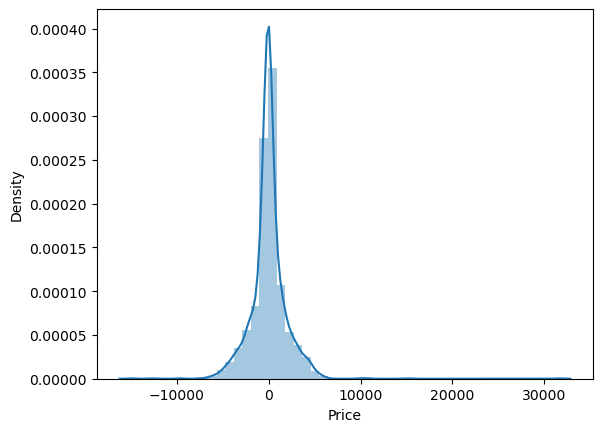

In [104]:
sns.distplot(y_test-y_pred)
plt.show()

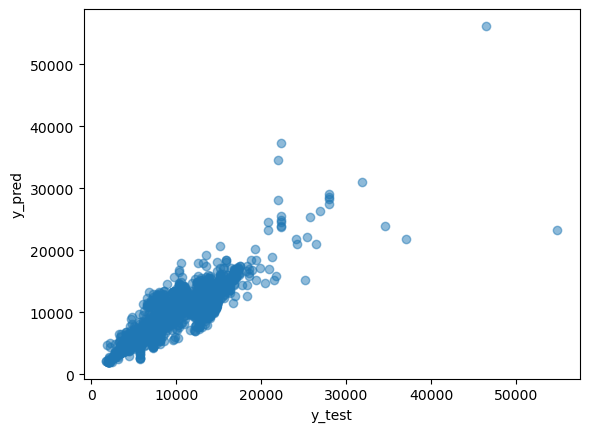

In [105]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [106]:
from sklearn import metrics

In [107]:
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1214.6079732362994
MSE: 3986949.731650846
RMSE: 1996.734767476854


In [108]:
metrics.r2_score(y_test,y_pred)

0.8056160152528422

# Hyperparameter Tuning

In [109]:
# we use Randomizesearchcv and gridsearchcv for tunig. Ist one is fast
# 1. assign hyperparameter in the form of dictionary
# 2. fit the model
# 3. check best params and best score

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
# Randomize search cv
# no.of trees in the forest
n_estimators=[int(x)for x in np.linspace(start=100, stop=1200, num=12)]
# no.of features to consider at every split
max_features=['log2','sqrt']
# max.no.of leaves in a tree
max_depth=[int(x)for x in np.linspace(5,30, num=6)]
# min no.samples required to split a node
min_samples_split=[2,5,10,15,100]
# min no.samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [112]:
# create the random grid

random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf
             }

In [113]:
rf_random=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=1, n_jobs=1)

In [114]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   3.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   3.0s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   3.0s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   3.0s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   3.1s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   2.2s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   2.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=100, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 15}

In [116]:
prediction=rf_random.predict(X_test)

/tmp/ipykernel_11460/3865557949.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


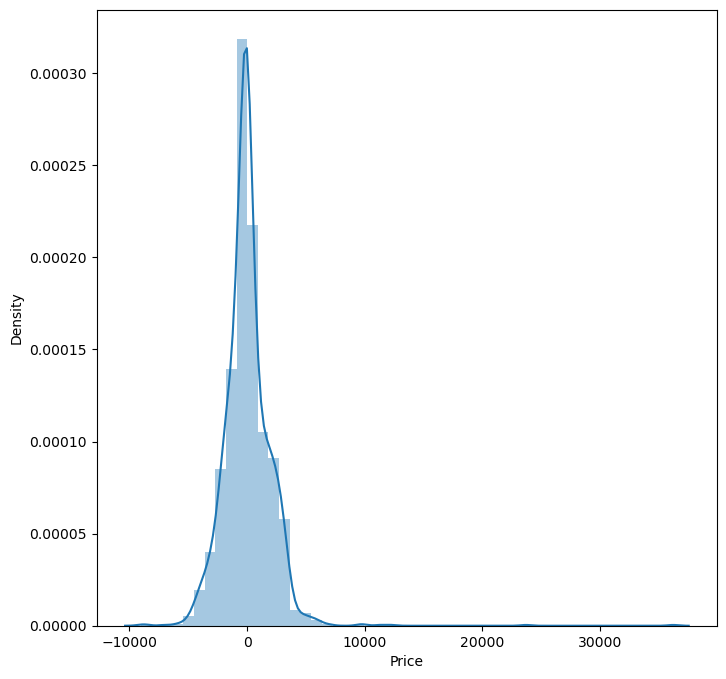

In [117]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

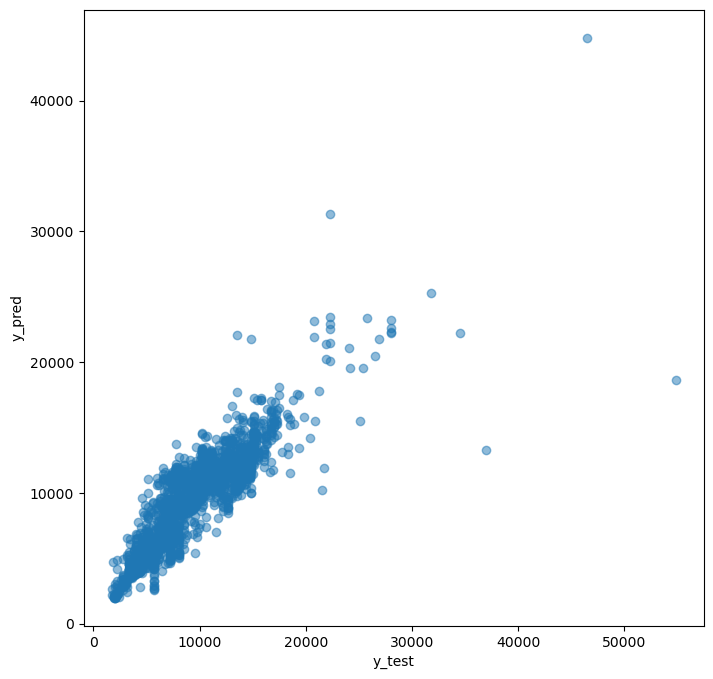

In [118]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [119]:
print("MAE:", metrics.mean_absolute_error(y_test,prediction))
print("MSE:", metrics.mean_squared_error(y_test,prediction))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1334.507120343993
MSE: 4189352.734662329
RMSE: 2046.7908380345875


# Save the model and resue it 

In [120]:
import pickle
# open a file
file=open('flight_rf.pkl','wb')
# dump information to that file
pickle.dump(rf_random,file)